In [1]:
# compare data from two images

In [2]:
from spectral import *
import spectral.io.envi as envi

In [3]:
img = envi.open('new_image_apples.hdr')

In [4]:
img.shape

(512, 512, 10)

ImageView object:
  Display bands       :  [4, 2, 0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.01947621781566047, 3.4060153696669904]
    G: [0.015288565529446465, 3.7909846138720935]
    B: [0.06405228758169934, 5.853921568627451]

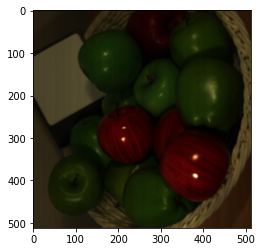

In [35]:
imshow(img, bands=[4,2,0])

In [37]:
reflectance = img.load()
print('Starting spectral PCA...')
print(50 * '-')
pc1 = principal_components(reflectance)
pc1_099 = pc1.reduce(fraction=0.99)
print("Components: ", len(pc1_099.eigenvalues))

Starting spectral PCA...
--------------------------------------------------
Components:  4


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-1.1210283627418878, 3.0668946365234944]
    G: [-1.4512023915406789, 0.9425916114127765]
    B: [-0.9705481882859166, 0.6226861293558751]

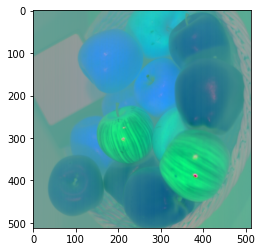

In [40]:
data1 = pc1_099.transform(reflectance)
images1 = data1
imshow(images1[:,:,1:4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

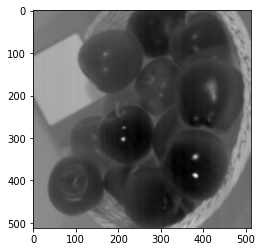

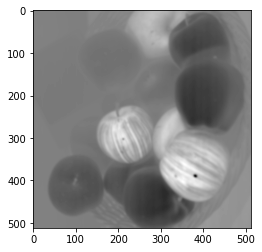

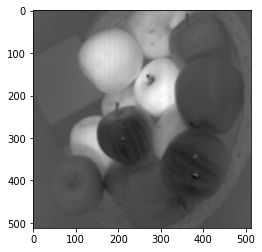

In [41]:
# SMOOTHING ------------------------------------

images1[:,:,1] = cv2.GaussianBlur(data1[:,:,1], (9,9), 0)
images1[:,:,2] = cv2.GaussianBlur(data1[:,:,2], (9,9), 0)
images1[:,:,3] = cv2.GaussianBlur(data1[:,:,3], (9,9), 0)
r1 = imshow(images1[:,:,1], stretch_all=True)
g1 = imshow(images1[:,:,2], stretch_all=True)
b1 = imshow(images1[:,:,3], stretch_all=True)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

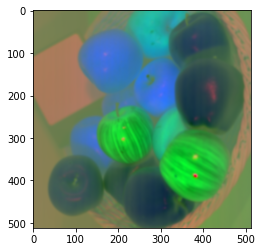

In [42]:
# FUNCAO EUREKA
rgb = get_rgb(images1[:,:,1:4]) # IMPORTANTE
imshow(rgb)

spectral:INFO: k-means iteration 1 - 262137 pixels reassigned.
INFO:spectral:k-means iteration 1 - 262137 pixels reassigned.
spectral:INFO: k-means iteration 2 - 18833 pixels reassigned.
INFO:spectral:k-means iteration 2 - 18833 pixels reassigned.
spectral:INFO: k-means iteration 3 - 57407 pixels reassigned.
INFO:spectral:k-means iteration 3 - 57407 pixels reassigned.
spectral:INFO: k-means iteration 4 - 61029 pixels reassigned.
INFO:spectral:k-means iteration 4 - 61029 pixels reassigned.
spectral:INFO: k-means iteration 5 - 45351 pixels reassigned.
INFO:spectral:k-means iteration 5 - 45351 pixels reassigned.
spectral:INFO: k-means iteration 6 - 9625 pixels reassigned.
INFO:spectral:k-means iteration 6 - 9625 pixels reassigned.
spectral:INFO: k-means iteration 7 - 2805 pixels reassigned.
INFO:spectral:k-means iteration 7 - 2805 pixels reassigned.
spectral:INFO: k-means iteration 8 - 577 pixels reassigned.
INFO:spectral:k-means iteration 8 - 577 pixels reassigned.
spectral:INFO: k-means

<IPython.core.display.Javascript object>

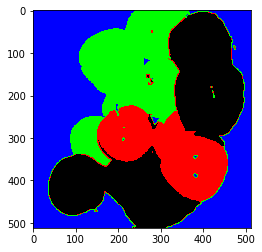

In [73]:
(m2,c2) = kmeans(rgb,5,10)
imshow(classes=m2)
plt.show()

In [75]:
print(np.min(m2))

<IPython.core.display.Javascript object>

0


In [76]:
print(np.max(m2))

<IPython.core.display.Javascript object>

3


In [77]:
masks = []
for k in range(4):
    mask = np.ones_like(rgb[:,:,0])
    for i in range(m2.shape[0]):
        for j in range(m2.shape[1]):
            if m2[i,j] == k:
                continue
            else:
                mask[i,j] = 0.0
    masks.append(mask)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

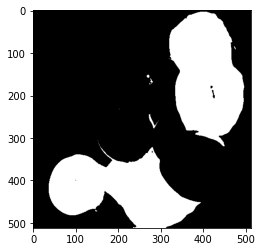

In [78]:
imshow(masks[0])

In [81]:
masks_apples = {"Real Green":masks[0]}

In [85]:
ga = masks_apples['Real Green'].reshape(512, 512, 1)

In [88]:
GA = ga * reflectance

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0908496379852295]
    G: [0.0, 1.539110541343689]
    B: [0.0, 2.411306142807007]

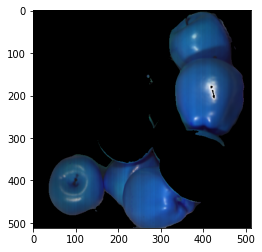

In [89]:
imshow(GA)

In [143]:
spectra_fake_green = GA.reshape(-1,GA.shape[2])

In [144]:
spectra_fake_green.shape

(262144, 10)

In [145]:
spectra_fake_green = np.delete(spectra_fake_green, np.all(spectra_fake_green==0, axis=1),axis=0)
spectra_fake_green.shape

(77653, 10)

In [146]:
mean_spectrum_fake_green1 = np.mean(spectra_fake_green, axis=0)

In [147]:
wl = np.linspace(430,970, 10)
def plot():

    plt.plot(wl,mean_spectrum_fake_green1, label='Fake Green Apples')
    plt.legend()
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('R(%)')
    plt.show()

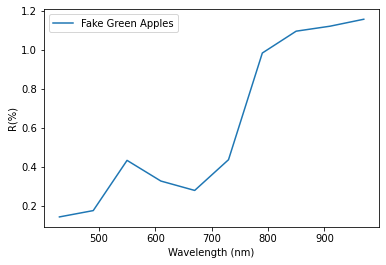

In [148]:
plot()

In [120]:
print(wl)

[430. 490. 550. 610. 670. 730. 790. 850. 910. 970.]


In [123]:
import spectral.io.envi as envi

path = '/Users/tiagocunha/Documents/workspace/data/testehsi/capture/'

# Open data files
raw_data = envi.open(path + 'SAMPLE.hdr')
dark_ref = envi.open(path + 'DARKREF.hdr')
white_ref = envi.open(path + 'WHITEREF.hdr')

In [124]:
dark = dark_ref.load()
white = white_ref.load()
raw = raw_data.load()

Starting spectral PCA...
--------------------------------------------------
Components:  5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

spectral:INFO: k-means iteration 1 - 262144 pixels reassigned.
INFO:spectral:k-means iteration 1 - 262144 pixels reassigned.
spectral:INFO: k-means iteration 2 - 52438 pixels reassigned.
INFO:spectral:k-means iteration 2 - 52438 pixels reassigned.
spectral:INFO: k-means iteration 3 - 42123 pixels reassigned.
INFO:spectral:k-means iteration 3 - 42123 pixels reassigned.
spectral:INFO: k-means iteration 4 - 32218 pixels reassigned.
INFO:spectral:k-means iteration 4 - 32218 pixels reassigned.
spectral:INFO: k-means iteration 5 - 35962 pixels reassigned.
INFO:spectral:k-means iteration 5 - 35962 pixels reassigned.
spectral:INFO: k-means iteration 6 - 17297 pixels reassigned.
INFO:spectral:k-means iteration 6 - 17297 pixels reassigned.
spectral:INFO: k-means iteration 7 - 7554 pixels reassigned.
INFO:spectral:k-means iteration 7 - 7554 pixels reassigned.
spectral:INFO: k-means iteration 8 - 3971 pixels reassigned.
INFO:spectral:k-means iteration 8 - 3971 pixels reassigned.
spectral:INFO: k-m

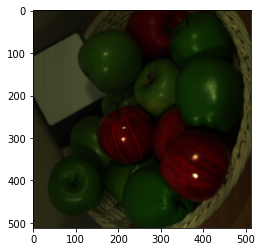

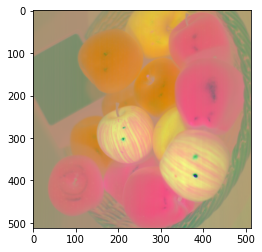

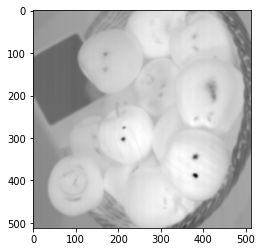

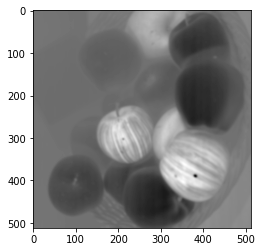

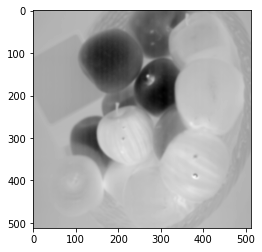

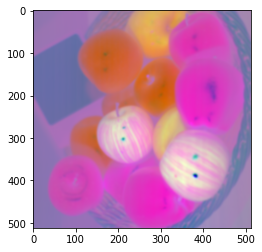

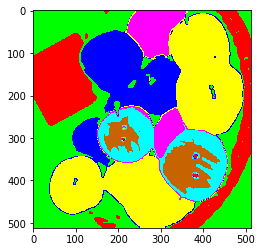

ImageView object:
  Display bands       :  [100, 50, 10]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.2577422857284546]
    G: [0.0, 1.6574162244796753]
    B: [0.0, 1.0536912679672241]

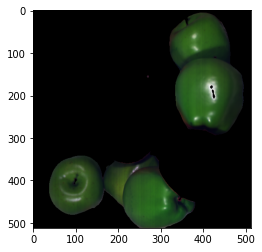

In [128]:
reflectance = (raw_data.load() - dark_ref.load()) / (white_ref.load() - dark_ref.load())
img10 = raw_data.load()
#spectral_angles(data, members)

#-----------------------------------------------------------------------------
# Show Data 


from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(42)

view = imshow(raw_data, bands=[100,50,10])


#-----------------------------------------------------------------------------
# Separate apples

# PCA ------------------------------------------
print('Starting spectral PCA...')
print(50 * '-')
pc1 = principal_components(reflectance)
pc1_099 = pc1.reduce(fraction=0.99)
print("Components: ", len(pc1_099.eigenvalues))

data1 = pc1_099.transform(reflectance)
images1 = data1
imshow(images1[:,:,1:4])

# SMOOTHING ------------------------------------

images1[:,:,1] = cv2.GaussianBlur(data1[:,:,1], (9,9), 0)
images1[:,:,2] = cv2.GaussianBlur(data1[:,:,2], (9,9), 0)
images1[:,:,3] = cv2.GaussianBlur(data1[:,:,3], (9,9), 0)
r1 = imshow(images1[:,:,1], stretch_all=True)
g1 = imshow(images1[:,:,2], stretch_all=True)
b1 = imshow(images1[:,:,3], stretch_all=True)
#imshow(images1[:,:,1:4])

# Image RGB "BALANCING" ------------------------

# FUNCAO EUREKA
img = get_rgb(images1[:,:,1:4]) # IMPORTANTE
imshow(img)

# K-MEANS --------------------------------------
# create masks for every object found in PCA
(m2,c2) = kmeans(img,8, 50)
imshow(classes=m2)
plt.show()
# 7 clusters encontrados
# KMEANS FUNCIONA MELHOR APOS PCA + SMOOTH :)

# MASKING --------------------------------------
# Elaborate Ground-truth

masks1 = []
for k in range(7):
    mask = np.ones_like(img[:,:,0])
    for i in range(m2.shape[0]):
        for j in range(m2.shape[1]):
            if m2[i,j] == k:
                continue
            else:
                mask[i,j] = 0.0
    masks1.append(mask)
    #imshow(mask)

# MASKS for apples
mask_fake_red_apples = np.zeros_like(masks1[0])
mask_fake_green_apples = np.zeros_like(masks1[0])
mask_real_red_apples = np.zeros_like(masks1[0])
mask_real_green_apples = np.zeros_like(masks1[0])
mask_background = np.zeros_like(masks1[0])

mask_fake_red_apples = masks1[6]
mask_fake_green_apples = masks1[4]
mask_real_red_apples = masks1[5]
mask_real_green_apples = masks1[3]
mask_background = masks1[2]

output = img * mask_fake_red_apples.reshape(512,512,1)
output = img * mask_fake_green_apples.reshape(512,512,1)
output = img * mask_real_green_apples.reshape(512,512,1)
output = img * mask_real_red_apples.reshape(512,512,1)

#-----------------------------------------------------------------------------
# Mean spectra -> Identity spectrum (EndMembers)


# Red Apples
r_fakeredApples = reflectance * mask_fake_red_apples.reshape(512,512,1)
r_realredApples = reflectance * mask_real_red_apples.reshape(512,512,1)
spectra_fake_red = r_fakeredApples.reshape(-1,reflectance.shape[2])
spectra_real_red = r_realredApples.reshape(-1,reflectance.shape[2])
fake_red = np.delete(spectra_fake_red, np.all(spectra_fake_red==0, axis=1),axis=0)
real_red = np.delete(spectra_real_red, np.all(spectra_real_red==0, axis=1),axis=0)
# Mean
mean_spectrum_fake_red = np.mean(fake_red, axis=0)
mean_spectrum_real_red = np.mean(real_red, axis=0)

#imshow(r_realredApples, bands=[100,50,10])

# Green Apples
r_fakegreenApples = reflectance * mask_fake_green_apples.reshape(512,512,1)
spectra_fake_green = r_fakegreenApples.reshape(-1,reflectance.shape[2])
fake_green = np.delete(spectra_fake_green, np.all(spectra_fake_green==0, axis=1),axis=0)
r_realgreenApples = reflectance * mask_real_green_apples.reshape(512,512,1)
spectra_real_green = r_realgreenApples.reshape(-1,reflectance.shape[2])
real_green = np.delete(spectra_real_green, np.all(spectra_real_green==0, axis=1),axis=0)
# Mean
mean_spectrum_fake_green = np.mean(fake_green, axis=0)
mean_spectrum_real_green = np.mean(real_green, axis=0)

imshow(r_fakegreenApples, bands=[100,50,10])

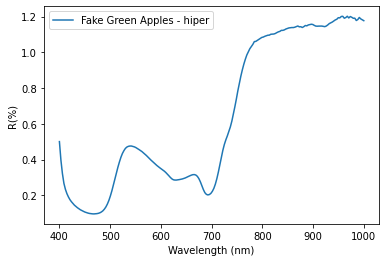

In [132]:
wl1 = np.linspace(400,1000, 204) # wavelength range for specim IQ

# Plot Red Apples spectra
def plot1():
    plt.plot(wl1,mean_spectrum_fake_green, label='Fake Green Apples - hiper')
    #plt.plot(wl,mean_spectrum_fake_green, label='Fake Green Apples - multi')
    plt.legend()
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('R(%)')
    plt.show()
plot1()

--- Properties  -------------------------------------------------------------------------------
Hyperspectral channels:  200
MultiSpectra channels:  10
--- Results  ----------------------------------------------------------------------------------
Relative deviations from conversion (%): 
['55.07', '51.09', '5.51', '11.75', '13.13', '39.71', '7.73', '1.41', '0.41', '1.00'] 

Min: 0.41% -- Max: 55.07% -- Avg: 18.68%
Wavelength range per channel: 60.0 nm


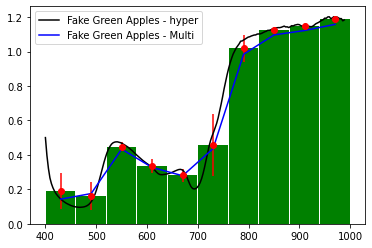

In [182]:
from termcolor import colored
def test(y, x, ch):
    # sum 10 adjacent bands for a single spectrum
    y_sum = y.reshape(ch, -1)

    # Analysis
    averages = []
    stds = []
    cvs = []
    for i in range(y_sum.shape[0]):
        averages.append(np.mean(y_sum[i]))
        stds.append(np.std(y_sum[i]))
        cvs.append(stds[i] / averages[i])

    # Properties
    print("--- " + colored('Properties', 'green'), " " + 79 * "-")
    print("Hyperspectral channels: ", y.shape[0])
    print("MultiSpectra channels: ", len(averages))
    # print(f"{averages=}")
    # print(f"{stds=}")
    # print(cvs)

    # Results
    print("--- " + colored('Results', 'red'), " " + 82 * "-")
    print(f"Relative deviations from conversion (%): ")
    print(f"{['{:.2f}'.format(std / avg * 100) for std, avg in zip(stds, averages)]} \n")
    print(f"Min: {format(cvs[np.argmin(cvs)] * 100, '.2f')}% -- Max: {format(cvs[np.argmax(cvs)] * 100, '.2f')}%",
          f"-- Avg: {format(np.average(cvs) * 100, '.2f')}%")
    print(f"Wavelength range per channel: {600/ch} nm")

    # Graphics
    plt.plot(x, y, color='black', label= 'Fake Green Apples - hyper')
    plt.plot(wl,mean_spectrum_fake_green1, label='Fake Green Apples - Multi', color='blue')
    plt.bar(x=np.linspace(400 + (600/(2*ch)), 1000 - (600/(2*ch)), len(averages)), height=averages, width=600/ch - 2, color='green')
    plt.errorbar(x=np.linspace(400 + (600/(2*ch)), 1000 - (600/(2*ch)), len(averages)), y=averages, yerr=stds, linestyle='None', marker='o', color='red')
    plt.legend()
    plt.show()
    
# TEST
test(mean_spectrum_fake_green[:200], wl1[:200], 10)